In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
lmfao = pd.read_csv("Youtube03-LMFAO.csv")  
lmfao

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0
...,...,...,...,...,...
433,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,1
434,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,0
435,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,1
436,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


In [4]:
lmfao.drop(columns=['COMMENT_ID', 'AUTHOR','DATE'], inplace = True)
lmfao   #spam = 1, ham(legimimate) = 0

,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0
...,...,...
433,Like this comment for no reason﻿,1
434,love this song﻿,0
435,this song is awesome. these guys are the best....,1
436,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


In [5]:
lmfao.isna().any()

CONTENT    False
CLASS      False
dtype: bool

In [6]:
lmfao.drop_duplicates(inplace = True)
lmfao.duplicated().sum()

0

In [7]:
lmfao[lmfao['CLASS']== 1].count()

CONTENT    145
CLASS      145
dtype: int64

In [8]:
# ham
lmfao[lmfao['CLASS'] == 0].count()

CONTENT    195
CLASS      195
dtype: int64

## Data Preprocessing

In [9]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [10]:
'''
Create a function that
- changes all the words to lower case
- tokenize the words
- remove special characters
- remove stop words and punctuation
- stemming

'''

def text_processing(CONTENT):
    text = CONTENT.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for j in text:
        if j not in stopwords.words('english') and i not in string.punctuation:
            y.append(j)
    text = y[:]
    y.clear()

    for w in text:
     #   y.append(ps.stem(w))     incase for stemming
        y.append(w)
    return " ".join(y)

    

In [11]:
#Adding a new column for the processed text from the content column
lmfao['TEXT_PROCESSED'] = lmfao['CONTENT'].apply(text_processing)
lmfao.head(20)

,CONTENT,CLASS,TEXT_PROCESSED
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0,http amp best
1,wierd but funny﻿,0,wierd
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1,hey guys 39 br br br 39 want human want sexy f...
3,Party Rock....lol...who wants to shuffle!!!﻿,0,party rock lol wants shuffle
4,Party rock﻿,0,party
5,Shuffle﻿,0,
6,Omg﻿,0,
7,This song is just really fun ﻿,0,song really fun
8,Awsome<br />﻿,0,awsome br
9,wow!!!!!! increible song!!!!!!!!!﻿,0,wow increible song


## Model Building
Algorithm used are
- Support Vector Classification(Linear, Polynomial, Gaussian)
- The Naive Bayes Method(Multinomial, Bernouli, Gaussian)
- Random Forest
- Decision Tree(CART)
- KNNeighbor
- Logistics Regression

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000 )
X = tfidf.fit_transform(lmfao['TEXT_PROCESSED']).toarray()
y = lmfao['CLASS'].values
#X.shape
#X = CountVectorizer(analyzer=text_processing).fit_transform(psy['CONTENT'])
#bag_of_words.shape
X.shape


(340, 715)

In [13]:
'''
splitting the data into training and testing set 
importing the necessary library for the Supervised Techniques and checking the accuracy/validity of the model
'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 0)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score, matthews_corrcoef

In [14]:
svc_Linear = SVC()
svc_Polynomial = SVC(kernel='poly')
svc_Gaussian = SVC(kernel='rbf')
knc = KNeighborsClassifier(n_neighbors=3)
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=80)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [15]:
clfs = {
    'SVM_Linear' : svc_Linear,
    'SVM_Polynomial' : svc_Polynomial,
    'SVM_Gaussian' : svc_Gaussian,
    'KNNeighbor' : knc, 
    'CART': dtc, 
    'LogisticsRegression': lrc, 
    'RandomForest': rfc, 
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB':bnb
}

In [16]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f_score = f1_score(y_test, y_pred)
    con_matrices =confusion_matrix(y_test,y_pred)
    return accuracy,precision,f_score,con_matrices

## Model Performance(UnOptimized)
- Matthew correlation Coefficient
- Accuracy
- Precision
- F_score
- Confusion Matrix

In [17]:
'''
   Using the Matthews correlation coefficient
'''

mcc_scores = []
for name, clf in clfs.items():
    clf.fit(X_train,y_train)
    current_mcc = matthews_corrcoef(y_test,clf.predict(X_test))
   
    print("==================")
    print(name)
    print(current_mcc)
    mcc_scores.append(current_mcc)


'''
    Checking the Accuracy, Precision, F-score and the confusion Matrix
'''

accuracy_scores = []
precision_scores = []
f1_scores = []
confusion_matrices = []
for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_f1_score, confusion_matrice = train_classifier(clf, X_train,y_train,X_test,y_test)
    print('--------------------------------')
    print(name)
    print("Accuracy ",current_accuracy)
    print("Precision - ",current_precision)
    print("f1_scores" , current_f1_score) 
    print('Confusion Matrix\n ',confusion_matrice)  
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1_score)
    confusion_matrices.append(confusion_matrice)

    print('--------------------------------')

SVM_Linear
0.7954345035153529
SVM_Polynomial
0.599101459623125
SVM_Gaussian
0.7954345035153529
KNNeighbor
0.599101459623125
CART
0.8237032218195663
LogisticsRegression
0.8237032218195663
RandomForest
0.8237032218195663
GaussianNB
0.5951826485514292
MultinomialNB
0.7539274385619287
BernoulliNB
0.7393691004272944
--------------------------------
SVM_Linear
Accuracy  0.8970588235294118
Precision -  1.0
f1_scores 0.851063829787234
Confusion Matrix
  [[41  0]
 [ 7 20]]
--------------------------------
--------------------------------
SVM_Polynomial
Accuracy  0.7941176470588235
Precision -  1.0
f1_scores 0.65
Confusion Matrix
  [[41  0]
 [14 13]]
--------------------------------
--------------------------------
SVM_Gaussian
Accuracy  0.8970588235294118
Precision -  1.0
f1_scores 0.851063829787234
Confusion Matrix
  [[41  0]
 [ 7 20]]
--------------------------------
--------------------------------
KNNeighbor
Accuracy  0.7941176470588235
Precision -  1.0
f1_scores 0.65
Confusion Matrix
  [[4

In [18]:
'''
    Arranging the performance based on the Matthew correlation coefficient in descending order for each Algorithm
'''
performance_lmfao = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F_scores':f1_scores, 'MCC_scores': mcc_scores}).sort_values('MCC_scores', ascending=False)
performance_lmfao

,Algorithm,Accuracy,Precision,F_scores,MCC_scores
4,CART,0.911765,1.000000,0.875000,0.823703
5,LogisticsRegression,0.911765,1.000000,0.875000,0.823703
6,RandomForest,0.911765,1.000000,0.875000,0.823703
0,SVM_Linear,0.897059,1.000000,0.851064,0.795435
2,SVM_Gaussian,0.897059,1.000000,0.851064,0.795435
8,MultinomialNB,0.882353,0.913043,0.840000,0.753927
9,BernoulliNB,0.867647,1.000000,0.800000,0.739369
1,SVM_Polynomial,0.794118,1.000000,0.650000,0.599101
3,KNNeighbor,0.794118,1.000000,0.650000,0.599101
7,GaussianNB,0.794118,0.696970,0.766667,0.595183


<AxesSubplot:xlabel='Algorithm'>

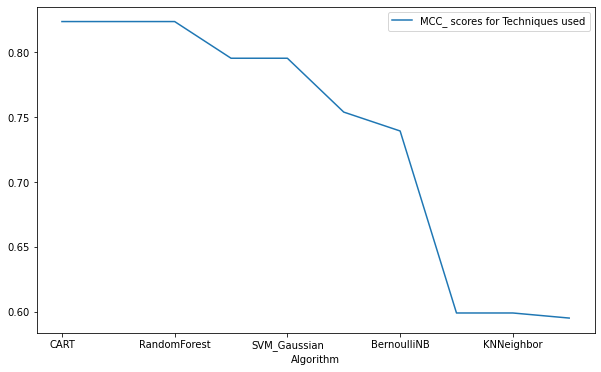

In [19]:
performance_lmfao.plot(x='Algorithm', y='MCC_scores', label='MCC_ scores for Techniques used', figsize = [10,6] )

## TUNING RESULT USING GRID SEARCH  

In [20]:
'''
    Tuning the support vectors for Linear, Polynomial and Gaussian to give the optimal parameter
'''
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'C':[0.5,1,10,100,0.1,0.01],
        'gamma':['scale',1, 0.1, 0.01, 0.001, 0.0001],
        'kernel':['rbf'] # ['rbf','poly','linear']
    }
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)
C,g,k = optimal_params.fit(X_train, y_train).best_params_.values()
print(f"-----------")
print(f"C = {C}")
print(f"gamma = {g}")
print(f"kernel = {k}")


-----------
C = 100
gamma = 0.1
kernel = rbf


In [21]:

'''
    Tuning the Naive Bayes method for Bernoulli, Multinomial and Gaussian to give the optimal parameter
'''

param_grid_nb = {
        'var_smoothing': np.logspace(0, -9, num = 100)
    }

optimal_params = GridSearchCV(estimator = GaussianNB(),param_grid= param_grid_nb,
    cv=10,
    scoring='accuracy',
    verbose=1
) # [multinomialNB, GaussianNB, BernouliNB]
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0003511191734215131)


In [22]:

'''
    Tuning the Naive Bayes method for KNNeigbor
'''

param_grid_knn = {
        'n_neighbors': [1,3,5,7,9]
    }

optimal_params = GridSearchCV(estimator = KNeighborsClassifier(),param_grid= param_grid_knn,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)


KNeighborsClassifier(n_neighbors=1)


In [23]:
'''
    Tuning the RandomForest 
'''

param_grid_rfc = {
        'n_estimators': [20,40,60,80,100]
    }

optimal_params = GridSearchCV(estimator = RandomForestClassifier(),param_grid= param_grid_rfc,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)



RandomForestClassifier(n_estimators=60)


In [24]:
'''
    Tuning the RandomForest 
'''
param_grid_lrc = [
{
        'C': [10, 15,20,30],
     }

]

optimal_params = GridSearchCV(estimator = LogisticRegression(),param_grid= param_grid_lrc,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)


LogisticRegression(C=20)


In [25]:
'''
    Tuning the Decision Tree (CART) 
'''
param_grid_dtc = [
{
        'criterion': ["gini"],
        'random_state':[None, 1,2,4,8,10]
     }

]

optimal_params = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid= param_grid_dtc,
    cv= 10,
    scoring ='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)

DecisionTreeClassifier(random_state=8)


## OPTIMIZED MODEL(Performance)

             Algorithm  Accuracy  Precision  F_scores  MCC_scores
4                 CART  0.911765   1.000000  0.875000    0.823703
5  LogisticsRegression  0.911765   1.000000  0.875000    0.823703
6         RandomForest  0.911765   1.000000  0.875000    0.823703
0           SVM_Linear  0.897059   1.000000  0.851064    0.795435
2         SVM_Gaussian  0.897059   1.000000  0.851064    0.795435
8        MultinomialNB  0.882353   0.913043  0.840000    0.753927
9          BernoulliNB  0.867647   1.000000  0.800000    0.739369
1       SVM_Polynomial  0.794118   1.000000  0.650000    0.599101
3           KNNeighbor  0.794118   1.000000  0.650000    0.599101
7           GaussianNB  0.794118   0.696970  0.766667    0.595183


<AxesSubplot:xlabel='Algorithm'>

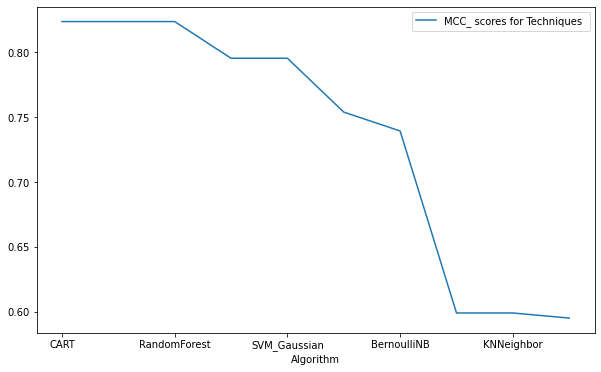

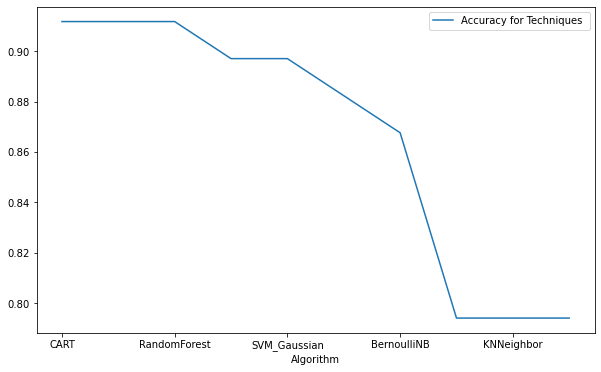

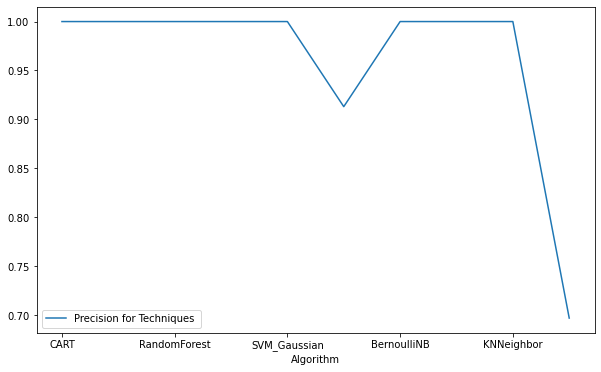

In [26]:
svc_Linear = SVC(kernel='linear', C=1, gamma = "scale")
svc_Polynomial = SVC(kernel='poly', C= 1, gamma = "scale")
svc_Gaussian = SVC(kernel='sigmoid',C = 10, gamma= 0.1)
knc = KNeighborsClassifier(n_neighbors=1, algorithm= "auto")
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(random_state=8)
lrc = LogisticRegression(solver='liblinear', penalty='l1', C = 20)
rfc = RandomForestClassifier(n_estimators=60, random_state=40)
gnb = GaussianNB( var_smoothing=0.0003511191734215131)
bnb = BernoulliNB()

clfs = {
    'SVM_Linear' : svc_Linear,
    'SVM_Polynomial' : svc_Polynomial,
    'SVM_Gaussian' : svc_Gaussian,
    'KNNeighbor' : knc, 
    'CART': dtc, 
    'LogisticsRegression': lrc, 
    'RandomForest': rfc, 
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB':bnb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f_score = f1_score(y_test, y_pred)
    con_matrices =confusion_matrix(y_test,y_pred)
    return accuracy,precision,f_score,con_matrices

'''
    Arranging the performance based on the Matthew correlation coefficient in descending order for each Algorithm
'''
performance_lmfao = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F_scores':f1_scores, 'MCC_scores': mcc_scores}).sort_values('MCC_scores', ascending=False)
print(performance_lmfao)

performance_lmfao.plot(x='Algorithm', y='MCC_scores', label='MCC_ scores for Techniques ', figsize = [10,6] )

performance_lmfao.plot(x='Algorithm', y='Accuracy', label='Accuracy for Techniques ', figsize = [10,6] )

performance_lmfao.plot(x='Algorithm', y='Precision', label='Precision for Techniques ', figsize = [10,6] )

<AxesSubplot:>

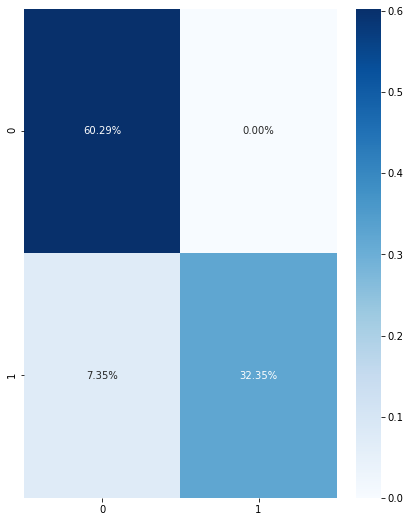

In [27]:
import seaborn as sns

'''
    A Heatmap confusion matrix for the predicted outcome for Linear support Vector Algorithms
'''


svc_Linear.fit(X_train,y_train)
y_pred_svc = svc_Linear.predict(X_test)
cm = confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(7,9))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')


<AxesSubplot:>

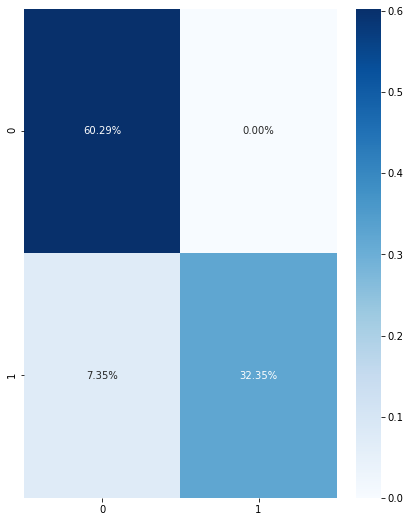

In [28]:
'''
    A Heatmap confusion matrix for the predicted outcome for Linear support Vector Algorithms
'''
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize=(7,9))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
